In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


بخش اول

In [ ]:
df = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')


In [ ]:
X = df.iloc[:, 0:2]
#X

In [ ]:
y = df.iloc[:,2]
#y

choosing 1/3 of the data as valdiation set:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

بخش دوم

we will use standardization to normalize the data:


---


normalized_df=(df-df.mean())/df.std()

In [ ]:
normalized_train = (X_train-X_train.mean())/X_train.std()
normalized_val = (X_val-X_val.mean())/X_val.std()
normalized_train['labels'] = y_train
normalized_val['labels'] = y_val #val means validation

#convert labels to int:
normalized_train.labels = normalized_train.labels.astype(int)
normalized_val.labels = normalized_val.labels.astype(int)


بخش سوم

plotting train set:

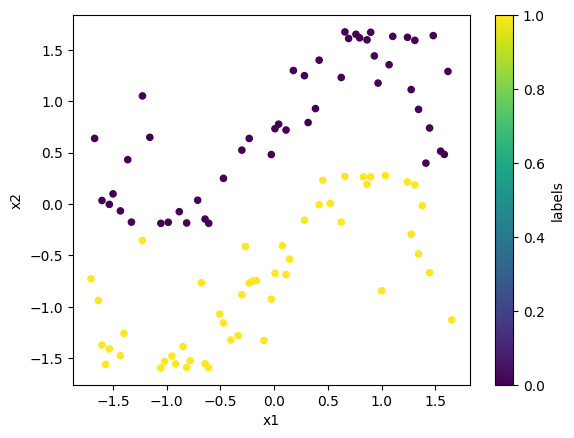

In [ ]:
train_plot = normalized_train.plot.scatter(x="x1" , y="x2" , c ="labels", colormap='viridis')

plotting valdation set:

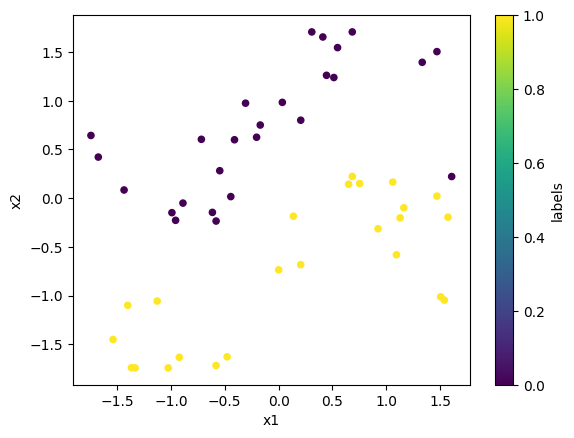

In [ ]:
val_plot = normalized_val.plot.scatter(x="x1" , y="x2" , c ="labels", colormap='viridis')

بخش چهارم

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,max_iter=100)

#x = shuffled[['x1', 'x2']]
#X = df.iloc[:, 0:2]
#normalized_train
x_train = normalized_train[['x1', 'x2']]
y_train = normalized_train[['labels']]
x_val = normalized_val[['x1', 'x2']]
y_val = normalized_val[['labels']]
p.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(max_iter=100, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(x_train)

predictions_test = p.predict(x_val)
train_score = accuracy_score(predictions_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, y_val)
print("score on validation data: ", test_score)

print('weights: ')
print(p.coef_)
print('Intercept: ')
print(p.intercept_)

score on train data:  0.94
score on validation data:  0.96
weights: 
[[ 2.36497081 -7.1015926 ]]
Intercept: 
[0.]


In [ ]:
x1 = pd.DataFrame(normalized_train['x1'].values)
x2 = pd.DataFrame(normalized_train['x2'].values)
y = pd.DataFrame(normalized_train['labels'].values)

#converting to list:
newx1 = []
for i in range(len(x1)):
    newx1.append(x1[0][i])
newx2 = []
for i in range(len(x2)):
    newx2.append(x2[0][i])
newy = []
for i in range(len(y)):
    newy.append(y[0][i])

x1 = newx1
x2 = newx2
y = newy




line is:  0.33301978063326265 x + [0.]
plot for train set:


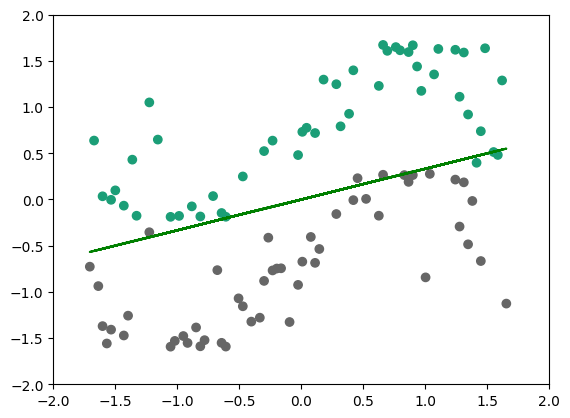

In [ ]:
c = y_train['labels']
axis_x = normalized_train['x1']
axis_y = normalized_train['x2']
plt.scatter(axis_x,axis_y,c=c,cmap='Dark2')
q = p.intercept_/p.coef_[0][1]
e = p.coef_[0][0]/p.coef_[0][1]

print("line is: ",-e,"x +",-q)
npx1 = np.array(x1)
y_pred = -q -(e*npx1)

print("plot for train set:")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.plot(npx1, y_pred, color = "g")

In [ ]:
x11 = pd.DataFrame(normalized_val['x1'].values)
x21 = pd.DataFrame(normalized_val['x2'].values)
y1 = pd.DataFrame(normalized_val['labels'].values)

#converting to list:
newx11 = []
for i in range(len(x11)):
    newx11.append(x11[0][i])
newx21 = []
for i in range(len(x21)):
    newx21.append(x21[0][i])
newy1 = []
for i in range(len(y1)):
    newy1.append(y1[0][i])

x11 = newx11
x21 = newx21
y1 = newy1




line is:  0.33301978063326265 x + [0.]
plot for validation set:


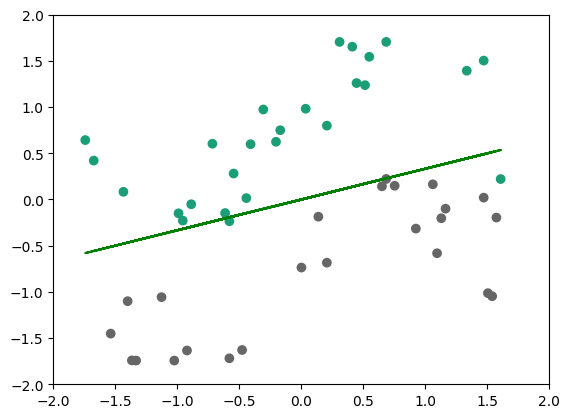

In [ ]:
c = y_val['labels']
axis_x = normalized_val['x1']
axis_y = normalized_val['x2']
plt.scatter(axis_x,axis_y,c=c,cmap='Dark2')
q = p.intercept_/p.coef_[0][1]
e = p.coef_[0][0]/p.coef_[0][1]

print("line is: ",-e,"x +",-q)
npx11 = np.array(x11)
y_pred = -q -(e*npx11)

print("plot for validation set:")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.plot(npx11, y_pred, color = "g")

بخش 5

In [147]:
#degrees 2, 3, 5, 10
from sklearn.preprocessing import PolynomialFeatures

def with_degree(degree):

  poly = PolynomialFeatures(degree=degree)

  X_train_with_degree = poly.fit_transform(x_train)
  X_val_with_degree = poly.transform(x_val)

  p.fit(X_train_with_degree, y_train)

  predict_train = p.predict(X_train_with_degree)
  accuracy_for_train = accuracy_score(y_train, predict_train)

  predict_val = p.predict(X_val_with_degree)
  accuracy_for_val = accuracy_score(y_val, predict_val)
  wrong = np.where(y_val['labels'] != predict_val)[0] #index where prediction is wrong









  return accuracy_for_train, accuracy_for_val, wrong


degrees = [2, 3, 5, 10]
results = {}
for degree in degrees:
    with_degree(degree)
    accuracy_for_train, accuracy_for_val, wrong = with_degree(degree)
    print("for degree of ", degree,":")
    print("train: ",accuracy_for_train)
    print("validation: ",accuracy_for_val)
    print("index of the one with wrong prediction:",wrong)
    print("_______________")


for degree of  2 :
train:  0.94
validation:  0.94
index of the one with wrong prediction: [15 23 28]
_______________
for degree of  3 :
train:  1.0
validation:  0.98
index of the one with wrong prediction: [28]
_______________
for degree of  5 :
train:  1.0
validation:  1.0
index of the one with wrong prediction: []
_______________
for degree of  10 :
train:  1.0
validation:  1.0
index of the one with wrong prediction: []
_______________


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

بحش 6

هر سه مدل دقت خوبی دارند ولی باید مدل ‌های ساده‌تر را انتخاب کنیم. مدل با درجه 2 دقت خوبی دارد پس همان را انتخاب می‌کنیم

[1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 1]
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


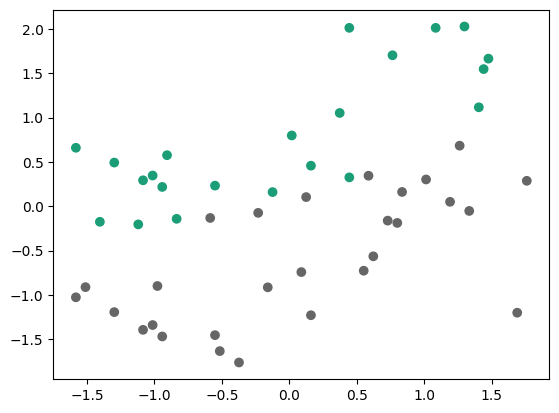

In [152]:
X_test = test.iloc[:, 0:2]

normalized_test = (X_test-X_test.mean())/X_test.std()

x_test = normalized_test

# let's train the data with degree = 2
degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_with_degree = poly.fit_transform(x_train)
X_val_with_degree = poly.transform(x_val)

p.fit(X_train_with_degree, y_train)

X_test_with_degree = poly.fit_transform(x_test)

predict_test = p.predict(X_test_with_degree)

print(predict_test)
print(type(predict_test))
pan = pd.DataFrame(predict_test)
pan.to_csv('preds.csv', index=False)


c = predict_test
axis_x = x_test['x1']
axis_y = x_test['x2']
plt.scatter(axis_x,axis_y,c=c,cmap='Dark2')



